In [1]:
# 1. 필요한 라이브러리 및 모듈 import
import sys
sys.path.append('../src')  # src 디렉토리를 Python 경로에 추가

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ml_project.data.preprocessing import DataPreprocessor

In [2]:
# 2. 샘플 데이터 로드
sample_data = pd.read_csv('../data/raw/csv_files/sample_weather_data.csv')

In [3]:
# 3. 데이터 기본 정보 확인
print("데이터 형태:", sample_data.shape)
print("\n기본 정보:")
print(sample_data.info())
print("\n기술 통계량:")
print(sample_data.describe())

데이터 형태: (1000, 4)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    905 non-null    float64
 1   humidity       894 non-null    float64
 2   wind_speed     891 non-null    float64
 3   precipitation  904 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB
None

기술 통계량:
       temperature    humidity  wind_speed  precipitation
count   905.000000  894.000000  891.000000     904.000000
mean     20.081718   60.972768    4.971870       0.971956
std       4.941577   15.060346    1.993786       0.975022
min       3.793663   15.894170   -1.039024       0.000031
25%      16.736880   50.868511    3.646727       0.285178
50%      20.134429   61.091144    4.952896       0.674053
75%      23.238443   70.970812    6.273810       1.310180
max      39.263657  107.896614   12.852475       6.096554


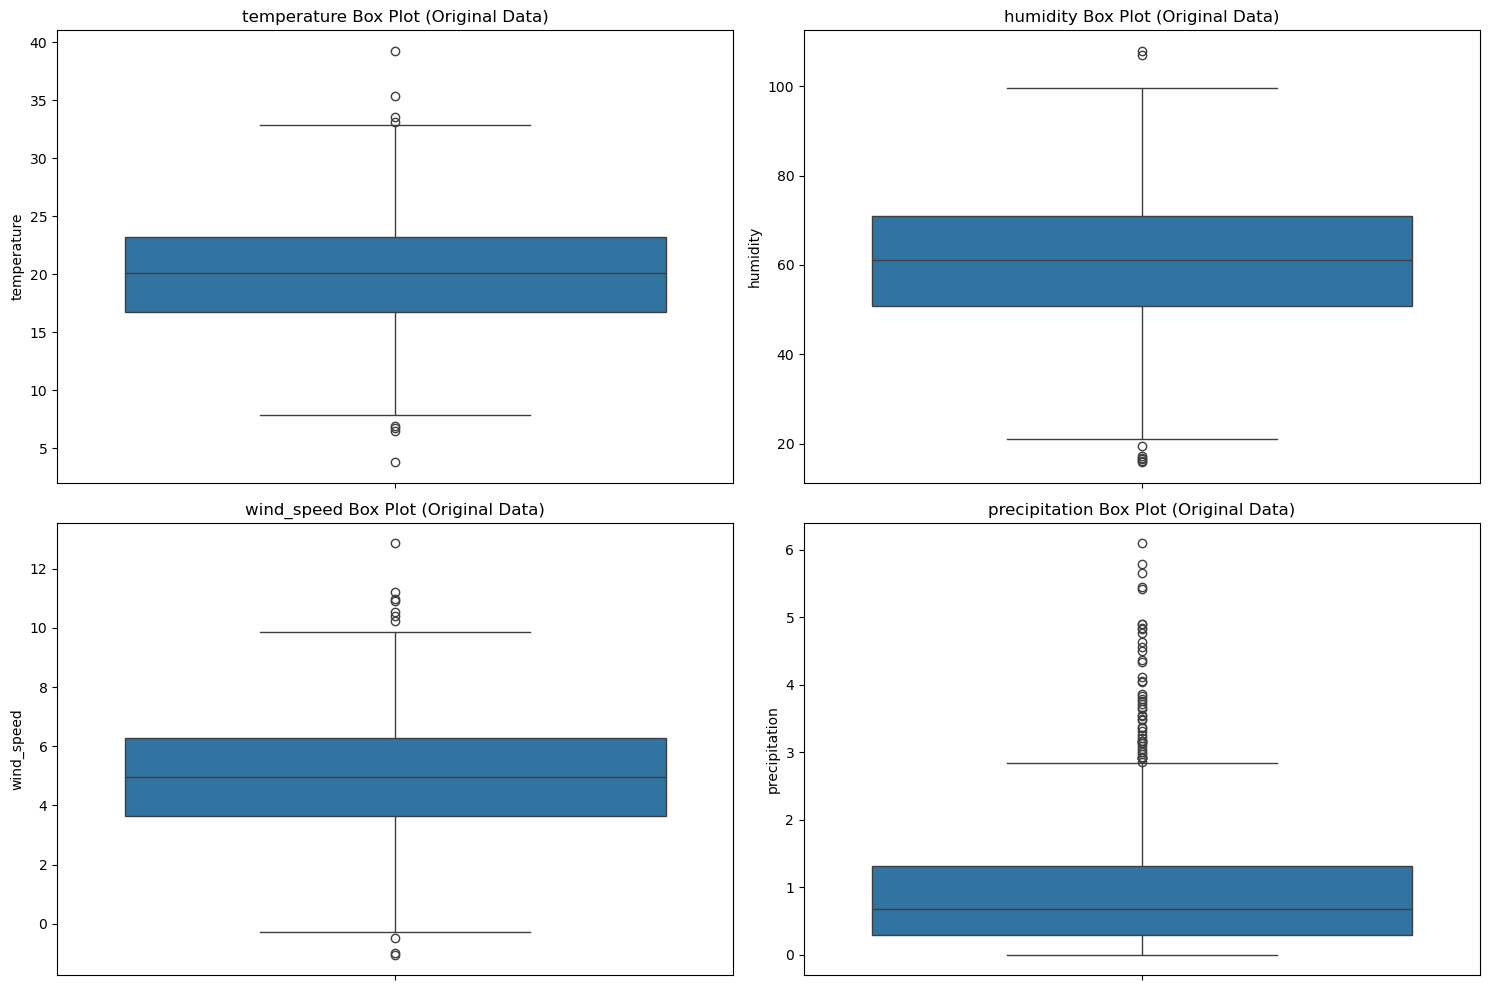

In [4]:
# 4. 데이터 분포 확인을 위한 boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(sample_data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=sample_data[column])
    plt.title(f'{column} Box Plot (Original Data)')
plt.tight_layout()
plt.show()

In [5]:
# 5. 이상치 처리 (IQR 방법)
preprocessor = DataPreprocessor()
cleaned_data_iqr = preprocessor.handle_outliers(sample_data, method='iqr', threshold=1.5)

250120153019 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 8 outliers in temperature using iqr method
250120153019 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in temperature
250120153019 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 8 outliers in humidity using iqr method
250120153019 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in humidity
250120153019 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 10 outliers in wind_speed using iqr method
250120153019 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in wind_speed
250120153019 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 48 outliers in precipitation using iqr method
250120153019 - [ml_project.data.p

In [6]:
# 6. 이상치 처리 (Z-score 방법)
cleaned_data_zscore = preprocessor.handle_outliers(sample_data, method='zscore', threshold=3)

250120153028 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 3 outliers in temperature using zscore method
250120153028 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in temperature
250120153028 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 2 outliers in humidity using zscore method
250120153028 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in humidity
250120153028 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 4 outliers in wind_speed using zscore method
250120153028 - [ml_project.data.preprocessing:141] - INFO - [ preprocessing.py:handle_outliers ] Handled outliers in wind_speed
250120153028 - [ml_project.data.preprocessing:127] - INFO - [ preprocessing.py:handle_outliers ] Found 18 outliers in precipitation using zscore method
250120153028 - [ml_pro

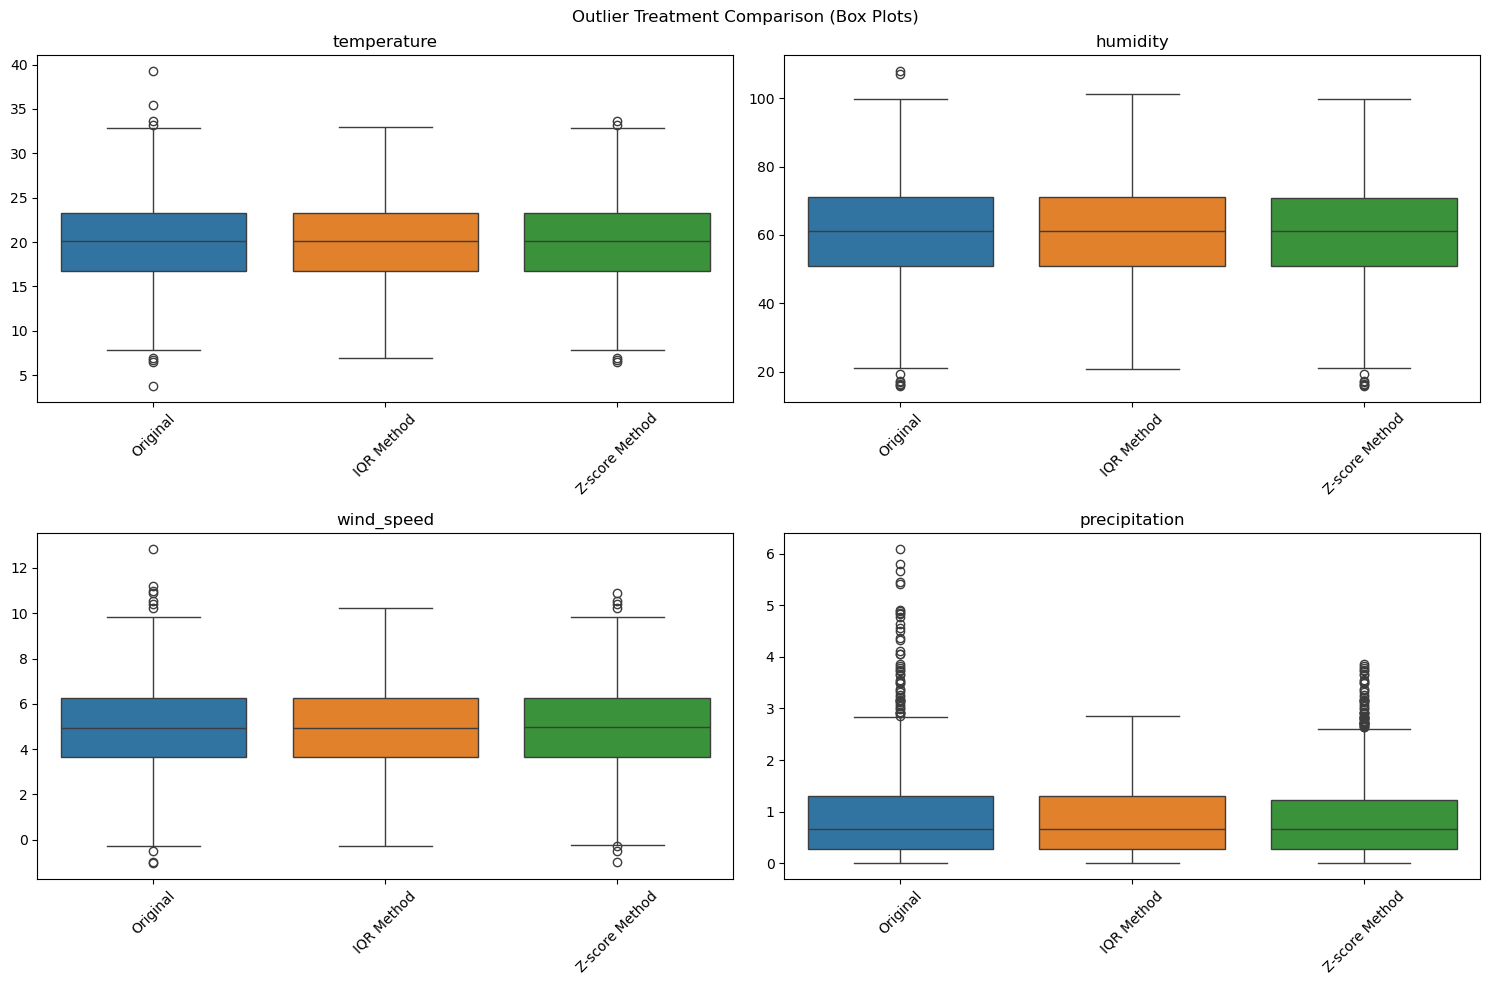

In [7]:
# 7. 처리 결과 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Treatment Comparison (Box Plots)')

for idx, column in enumerate(sample_data.columns):
    row = idx // 2
    col = idx % 2
    
    comparison_df = pd.DataFrame({
        'Original': sample_data[column],
        'IQR Method': cleaned_data_iqr[column],
        'Z-score Method': cleaned_data_zscore[column]
    })
    
    sns.boxplot(data=comparison_df, ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# 8. 기술 통계량 비교
comparison_stats = pd.concat([
    sample_data.describe().round(2),
    cleaned_data_iqr.describe().round(2),
    cleaned_data_zscore.describe().round(2)
], axis=1, keys=['Original', 'IQR Method', 'Z-score Method'])

print("\n처리 전/후 기술 통계량 비교:")
print(comparison_stats)


처리 전/후 기술 통계량 비교:
         Original                                    IQR Method           \
      temperature humidity wind_speed precipitation temperature humidity   
count      905.00   894.00     891.00        904.00      905.00   894.00   
mean        20.08    60.97       4.97          0.97       20.08    60.98   
std          4.94    15.06       1.99          0.98        4.90    14.95   
min          3.79    15.89      -1.04          0.00        6.98    20.72   
25%         16.74    50.87       3.65          0.29       16.74    50.87   
50%         20.13    61.09       4.95          0.67       20.13    61.09   
75%         23.24    70.97       6.27          1.31       23.24    70.97   
max         39.26   107.90      12.85          6.10       32.99   101.12   

                               Z-score Method                      \
      wind_speed precipitation    temperature humidity wind_speed   
count     891.00        904.00         905.00   894.00     891.00   
mean        4